In [3]:
#PREPROCESS STEP


import pandas as pd
from sklearn.preprocessing import MinMaxScaler


# USING FUNCTION TO HANDLE_OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df



# DATAAET
df = pd.read_csv(r"C:\Users\nh013\Desktop\trafic control.csv\traffic.csv")


# SELECTED FEATURE
df = df[['DateTime','Junction','Vehicles','ID']]


# IDENTIFYING MISSINFG VALUES
print(df.isnull().sum())

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)


#FILL MISSING VALUES WITH MEAN
mean = df.mean()
df.fillna(mean, inplace=True)

#FILL MISSING VALUES WITH MODE
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

#FILL MISSING VALUES WITH FORWARD FILL
df.fillna(method='ffill', inplace=True)

#FILL MISSING VALUES WITH  BACKWARD FILL
df.fillna(method='bfill', inplace=True)


# ONE -HOT ENCODING
df = pd.get_dummies(df, columns=['Junction'])

# HANDLE OUTLIERS
df = handle_outliers(df, 'Vehicles')


# REMOVE DUBLICATE ROWS
df.drop_duplicates(inplace=True)


scaler = MinMaxScaler()
df[['Vehicles']] = scaler.fit_transform(df[['Vehicles']])

# GROUPBY MATHOD
vehicles_per_junction_id = df.groupby(['DateTime', 'ID'])['Vehicles'].sum()


print(df)
print(df.shape[0])


print(vehicles_per_junction_id)

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64
                  DateTime  Vehicles           ID  Junction_1  Junction_2  \
0      2015-11-01 00:00:00  0.241379  20151101001           1           0   
1      2015-11-01 01:00:00  0.206897  20151101011           1           0   
2      2015-11-01 02:00:00  0.155172  20151101021           1           0   
3      2015-11-01 03:00:00  0.103448  20151101031           1           0   
4      2015-11-01 04:00:00  0.137931  20151101041           1           0   
...                    ...       ...          ...         ...         ...   
48115  2017-06-30 19:00:00  0.172414  20170630194           0           0   
48116  2017-06-30 20:00:00  0.500000  20170630204           0           0   
48117  2017-06-30 21:00:00  0.258621  20170630214           0           0   
48118  2017-06-30 22:00:00  0.362069  20170630224           0           0   
48119  2017-06-30 23:00:00  0.189655  20170630234           0           0   

      

C:\Users\nh013\AppData\Local\Temp\ipykernel_5500\24530054.py:36: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()


In [5]:
# ROLLING STATISTICS FEATURE ENGINEERING


import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# USING FUNCTION TO HANDLE_OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df



# DATAAET
df = pd.read_csv(r"C:\Users\nh013\Desktop\trafic control.csv\traffic.csv")

# FEATURE SELECTION
df = df[['DateTime','Junction','Vehicles','ID']]

# IDENTIFY MISSING VALUES
print(df.isnull().sum())

# DROP MISSING VALUES
df.dropna(inplace=True)

#FILL MISSING VALUES WITH MEAN
mean = df.mean()
df.fillna(mean, inplace=True)


#FILL MISSING VALUES WITH MODE
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

#FILL MISSING VALUES WITH FORWARD FILL
df.fillna(method='ffill', inplace=True)

#FILL MISSING VALUES WITH  BACKWARD FILL
df.fillna(method='bfill', inplace=True)


# ONE HOT ENCODIN
df = pd.get_dummies(df, columns=['Junction'])

#HANDLE OUTLIERS
df = handle_outliers(df, 'Vehicles')

# REMOVE DUBLICATE ROWS
df.drop_duplicates(inplace=True)


scaler = MinMaxScaler()
df[['Vehicles']] = scaler.fit_transform(df[['Vehicles']])


scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])




df['Average_rolling_mean'] = df['Vehicles'].rolling(window=30).mean()
df['Average_rolling_std'] = df['Vehicles'].rolling(window=30).std()


df.dropna(inplace=True)


print(df)
print(df.shape[0])

DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64
                  DateTime  Vehicles        ID  Junction_1  Junction_2  \
29     2015-11-02 05:00:00 -0.548444 -2.001083    1.738170   -0.698461   
30     2015-11-02 06:00:00 -0.397522 -2.001082    1.738170   -0.698461   
31     2015-11-02 07:00:00 -0.322061 -2.001080    1.738170   -0.698461   
32     2015-11-02 08:00:00 -0.472983 -2.001078    1.738170   -0.698461   
33     2015-11-02 09:00:00  0.281630 -2.001077    1.738170   -0.698461   
...                    ...       ...       ...         ...         ...   
48115  2017-06-30 19:00:00 -0.548444  1.282975   -0.575318   -0.698461   
48116  2017-06-30 20:00:00  0.885320  1.282977   -0.575318   -0.698461   
48117  2017-06-30 21:00:00 -0.171138  1.282979   -0.575318   -0.698461   
48118  2017-06-30 22:00:00  0.281630  1.282980   -0.575318   -0.698461   
48119  2017-06-30 23:00:00 -0.472983  1.282982   -0.575318   -0.698461   

       Junction_3  Junction_4  Average_rol

C:\Users\nh013\AppData\Local\Temp\ipykernel_5500\3223188325.py:32: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()


DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64


C:\Users\nh013\AppData\Local\Temp\ipykernel_5500\3100950426.py:43: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  mean = df.mean()


                 DateTime  Vehicles        ID  Junction_1  Junction_2  \
3     2015-11-01 03:00:00 -0.850295 -2.001593    1.738405   -0.698496   
4     2015-11-01 04:00:00 -0.699377 -2.001591    1.738405   -0.698496   
5     2015-11-01 05:00:00 -0.925754 -2.001589    1.738405   -0.698496   
6     2015-11-01 06:00:00 -0.699377 -2.001588    1.738405   -0.698496   
7     2015-11-01 07:00:00 -0.774836 -2.001586    1.738405   -0.698496   
...                   ...       ...       ...         ...         ...   
48115 2017-06-30 19:00:00 -0.548458  1.282971   -0.575240   -0.698496   
48116 2017-06-30 20:00:00  0.885268  1.282972   -0.575240   -0.698496   
48117 2017-06-30 21:00:00 -0.171162  1.282974   -0.575240   -0.698496   
48118 2017-06-30 22:00:00  0.281594  1.282976   -0.575240   -0.698496   
48119 2017-06-30 23:00:00 -0.472999  1.282977   -0.575240   -0.698496   

       Junction_3  Junction_4      year     month       day      hour  minute  \
3       -0.695222   -0.328904 -2.012395  1

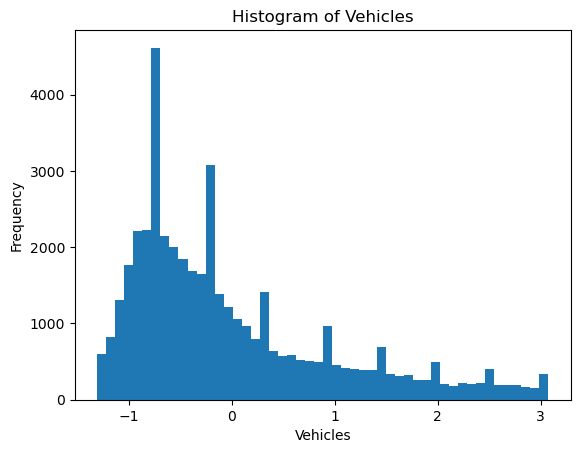

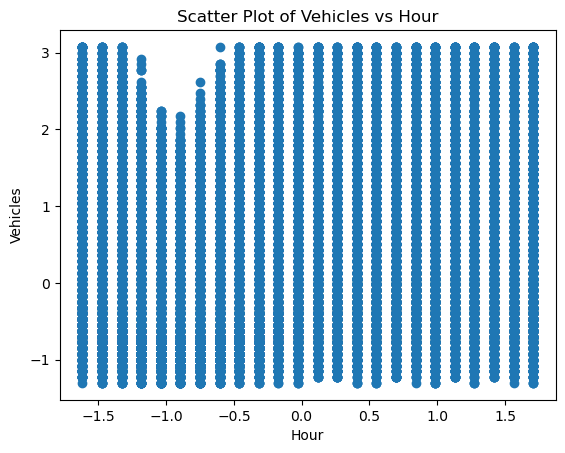

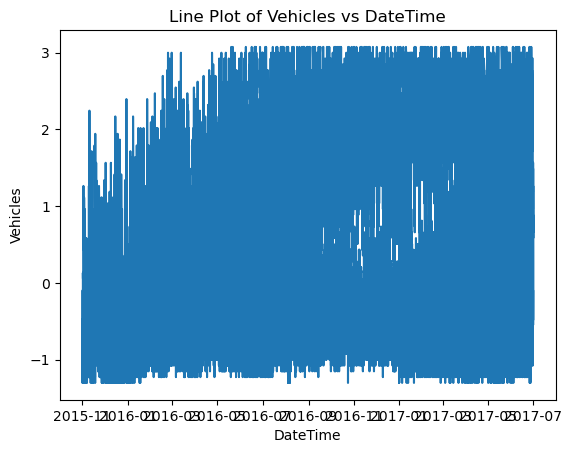

In [6]:
#using dynamic feature 


#add dynamic features to the preprocessed data, add lag features for the numerical variables and time-based 
#features for the datetime variable. 
#added the following dynamic features:
#Year, month, day, hour, minute, and dayofweek extracted from the datetime column.
#Lag features for the Vehicles column with lags of 1, 2, and 3.


import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler

import matplotlib.pyplot as plt
import seaborn as sns


# USING FUNCTION TO HANDLE_OUTLIERS
def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5*IQR
    upper_bound = Q3 + 1.5*IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df



# DATASET
df = pd.read_csv(r"C:\Users\nh013\Desktop\trafic control.csv\traffic.csv")

# FEATURE SELECT
df = df[['DateTime','Junction','Vehicles','ID']]

# IDENTIFYING MISSING VALUES
print(df.isnull().sum())

# DROP MISSING VALUES
df.dropna(inplace=True)

#FILL MISSING VALUES WITH MEAN
mean = df.mean()
df.fillna(mean, inplace=True)

#FILL MISSING VALUES WITH MODE
mode = df.mode().iloc[0]
df.fillna(mode, inplace=True)

#FILL MISSING VALUES WITH FORWARD FILL
df.fillna(method='ffill', inplace=True)

#FILL MISSING VALUES WITH  BACKWARD FILL
df.fillna(method='bfill', inplace=True)


# ONE HOT ENCODING
df = pd.get_dummies(df, columns=['Junction'])

#HANDLE OUTLIERS
df = handle_outliers(df, 'Vehicles')

#DYNAMIC FEATURE
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['year'] = df['DateTime'].dt.year
df['month'] = df['DateTime'].dt.month
df['day'] = df['DateTime'].dt.day
df['hour'] = df['DateTime'].dt.hour
df['minute'] = df['DateTime'].dt.minute
df['dayofweek'] = df['DateTime'].dt.dayofweek
df['lag1'] = df['Vehicles'].shift(1)
df['lag2'] = df['Vehicles'].shift(2)
df['lag3'] = df['Vehicles'].shift(3)

# DROP ROWS WITH MISSING VALUES
df.dropna(inplace=True)


scaler = MinMaxScaler()
df[['Vehicles', 'lag1', 'lag2', 'lag3']] = scaler.fit_transform(df[['Vehicles', 'lag1', 'lag2', 'lag3']])


scaler = StandardScaler()
num_cols = df.select_dtypes(include='number').columns
df[num_cols] = scaler.fit_transform(df[num_cols])


print(df)
print(df.shape[0])

# BUILD HISTOGRAM
plt.hist(df['Vehicles'], bins=50)
plt.xlabel('Vehicles')
plt.ylabel('Frequency')
plt.title('Histogram of Vehicles')
plt.show()


plt.scatter(df['hour'], df['Vehicles'])
plt.xlabel('Hour')
plt.ylabel('Vehicles')
plt.title('Scatter Plot of Vehicles vs Hour')
plt.show()


plt.plot(df['DateTime'], df['Vehicles'])
plt.xlabel('DateTime')
plt.ylabel('Vehicles')
plt.title('Line Plot of Vehicles vs DateTime')
plt.show()